# 라이브러리 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 시각화 위한 폰트 설정

In [2]:
# 한글 폰트 사용 위한 설치
# !pip install koreanize-matplotlib

In [3]:
import koreanize_matplotlib

%config InlineBackend.figure_format = 'retina'

<AxesSubplot:title={'center':'한글'}>

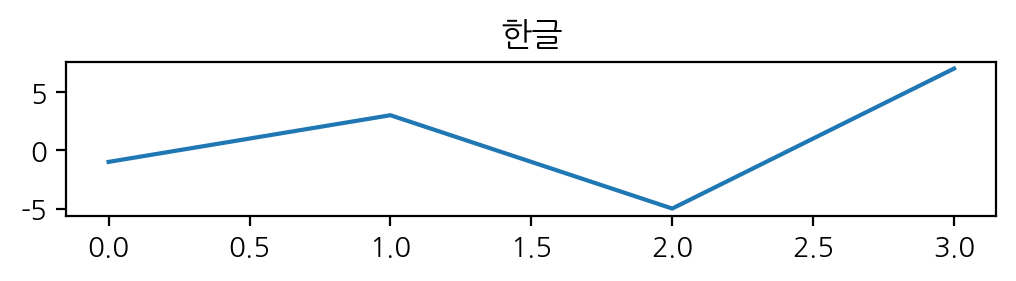

In [4]:
# 한글 잘 나오나 확인 (음수까지)
pd.Series([-1, 3, -5, 7]).plot(title="한글", figsize=(6, 1))

# 파일 불러오기

In [5]:
# 정규식을 통해 파일 경로 검색
from glob import glob

glob("data/seoul*.csv")

['data/seoul-covid19-2021-12-26.csv', 'data/seoul-covid19-2021-12-18.csv']

In [6]:
# csv 파일 불러오기
df_01 = pd.read_csv('data/seoul-covid19-2021-12-18.csv')
df_01.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,200000,561465,2021-12-18,중구,-,기타 확진자 접촉,NaN
1,199999,562278,2021-12-18,구로구,-,구로구 소재 요양시설 관련('21.11.),NaN
2,199998,562213,2021-12-18,금천구,-,기타 확진자 접촉,NaN
3,199997,562362,2021-12-18,중구,-,감염경로 조사중,NaN
4,199996,560491,2021-12-18,중구,-,기타 확진자 접촉,NaN


In [7]:
df_02 = pd.read_csv('data/seoul-covid19-2021-12-26.csv')
df_02.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,218646,611159,2021-12-26,노원구,-,감염경로 조사중,NaN
1,218645,610703,2021-12-26,노원구,-,감염경로 조사중,NaN
2,218644,611537,2021-12-26,송파구,-,감염경로 조사중,NaN
3,218643,607530,2021-12-26,송파구,-,감염경로 조사중,NaN
4,218642,607522,2021-12-26,송파구,-,감염경로 조사중,NaN


# concat 으로 데이터프레임 합치기

In [8]:
df = pd.concat([df_01, df_02])
df.shape

(218646, 7)

## 합친 데이터 확인 

In [9]:
df.head(2)

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,200000,561465,2021-12-18,중구,-,기타 확진자 접촉,NaN
1,199999,562278,2021-12-18,구로구,-,구로구 소재 요양시설 관련('21.11.),NaN


## 중복 제거

In [10]:
# 중복 데이터가 없음을 알 수 있음
df[df.duplicated()]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


In [11]:
# 중복이 있다면 제거하는 코드
df = df.drop_duplicates()
df.shape

(218646, 7)

## index 설정

In [12]:
# shape
df.shape

(218646, 7)

In [13]:
# nunique
df.nunique()

연번      218646
환자      218644
확진일        671
거주지         34
여행력        183
접촉력       1417
퇴원현황         2
dtype: int64

In [14]:
df.describe()

,연번,환자
count,218646.000000,218646.000000
mean,109323.500000,322462.160977
std,63117.807816,173903.371149
min,1.000000,2.000000
25%,54662.250000,168409.250000
50%,109323.500000,336181.500000
75%,163984.750000,470149.500000
max,218646.000000,611669.000000


In [15]:
# 연번의 개수가 행의 개수와 같다 = 유일값이다 = index로 만들자
df = df.set_index("연번")
df.head(2)

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
200000,561465,2021-12-18,중구,-,기타 확진자 접촉,NaN
199999,562278,2021-12-18,구로구,-,구로구 소재 요양시설 관련('21.11.),NaN


## 연번 순 정렬

In [16]:
# 최신 자료부터 보기 위해 역순 정렬
df = df.sort_index(ascending=False)
df.head(2)

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
218646,611159,2021-12-26,노원구,-,감염경로 조사중,NaN
218645,610703,2021-12-26,노원구,-,감염경로 조사중,NaN


# Attributes of Pandas

In [17]:
# shape
df.shape

(218646, 6)

In [18]:
# dtypes
df.dtypes

환자       int64
확진일     object
거주지     object
여행력     object
접촉력     object
퇴원현황    object
dtype: object

In [19]:
# columns
df.columns

Index(['환자', '확진일', '거주지', '여행력', '접촉력', '퇴원현황'], dtype='object')

In [20]:
# index
df.index

Int64Index([218646, 218645, 218644, 218643, 218642, 218641, 218640, 218639,
            218638, 218637,
            ...
                10,      9,      8,      7,      6,      5,      4,      3,
                 2,      1],
           dtype='int64', name='연번', length=218646)

In [21]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218646 entries, 218646 to 1
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   환자      218646 non-null  int64 
 1   확진일     218646 non-null  object
 2   거주지     218646 non-null  object
 3   여행력     218646 non-null  object
 4   접촉력     218646 non-null  object
 5   퇴원현황    163497 non-null  object
dtypes: int64(1), object(5)
memory usage: 11.7+ MB


# 결측치 보기

In [22]:
# 결측치 합계
df.isnull().sum()

환자          0
확진일         0
거주지         0
여행력         0
접촉력         0
퇴원현황    55149
dtype: int64

In [23]:
# 결측치 비율
df.isnull().mean() * 100

환자       0.000000
확진일      0.000000
거주지      0.000000
여행력      0.000000
접촉력      0.000000
퇴원현황    25.222963
dtype: float64

# 기술통계

In [24]:
df.describe()

,환자
count,218646.000000
mean,322462.160977
std,173903.371149
min,2.000000
25%,168409.250000
50%,336181.500000
75%,470149.500000
max,611669.000000


In [25]:
df.describe(include='object')

,확진일,거주지,여행력,접촉력,퇴원현황
count,218646,218646,218646,218646,163497
unique,671,34,183,1417,2
top,2021-12-14,송파구,-,기타 확진자 접촉,퇴원
freq,3165,13235,215575,90055,161849


# 날짜 데이터 타입 변경

In [26]:
# 확진일 Series
df["확진일"]

연번
218646    2021-12-26
218645    2021-12-26
218644    2021-12-26
218643    2021-12-26
218642    2021-12-26
             ...    
5         2020-01-31
4         2020-01-30
3         2020-01-30
2         2020-01-30
1         2020-01-24
Name: 확진일, Length: 218646, dtype: object

In [27]:
df["확진일"] = pd.to_datetime(df["확진일"])

# 파생변수 만들기

## 연, 월, 일, 요일 만들기

In [28]:
df["연도"] = df["확진일"].dt.year
df["월"] = df["확진일"].dt.month
df["일"] = df["확진일"].dt.day
df["요일"] = df["확진일"].dt.dayofweek
df.head(1)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일
연번,,,,,,,,,,
218646,611159,2021-12-26,노원구,-,감염경로 조사중,NaN,2021,12,26,6


## 연도-월 만들기

In [29]:
df["연도"].astype(str) + "-" + df["월"].astype(str)

연번
218646    2021-12
218645    2021-12
218644    2021-12
218643    2021-12
218642    2021-12
           ...   
5          2020-1
4          2020-1
3          2020-1
2          2020-1
1          2020-1
Length: 218646, dtype: object

In [30]:
# 슬라이싱으로도 가능
df["연도월"] = df["확진일"].astype(str).str[:7]

In [31]:
df[["확진일", "연도월"]].sample(3)

,확진일,연도월
연번,,
114772,2021-10-23,2021-10
18554,2020-12-29,2020-12
90090,2021-09-17,2021-09


## 요일 한글로 만들기

In [32]:
def find_dayofweek(day_no):
    dayofweek = "월화수목금토일"
    return dayofweek[day_no]

In [33]:
find_dayofweek(0)

'월'

In [34]:
# 함수 버전
df["요일명"] = df["요일"].map(find_dayofweek)

In [35]:
# 람다 버전
df["요일명"] = df["요일"].map(lambda x: "월화수목금토일"[x])

In [36]:
df.sample(3)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명
연번,,,,,,,,,,,,
91121,285733,2021-09-18,용산구,-,감염경로 조사중,퇴원,2021,9,18,5,2021-09,토
191166,540066,2021-12-15,관악구,-,기타 확진자 접촉,NaN,2021,12,15,2,2021-12,수
213463,597536,2021-12-24,마포구,-,기타 확진자 접촉,NaN,2021,12,24,4,2021-12,금


# 전체 수치 변수 히스토그램 그리기

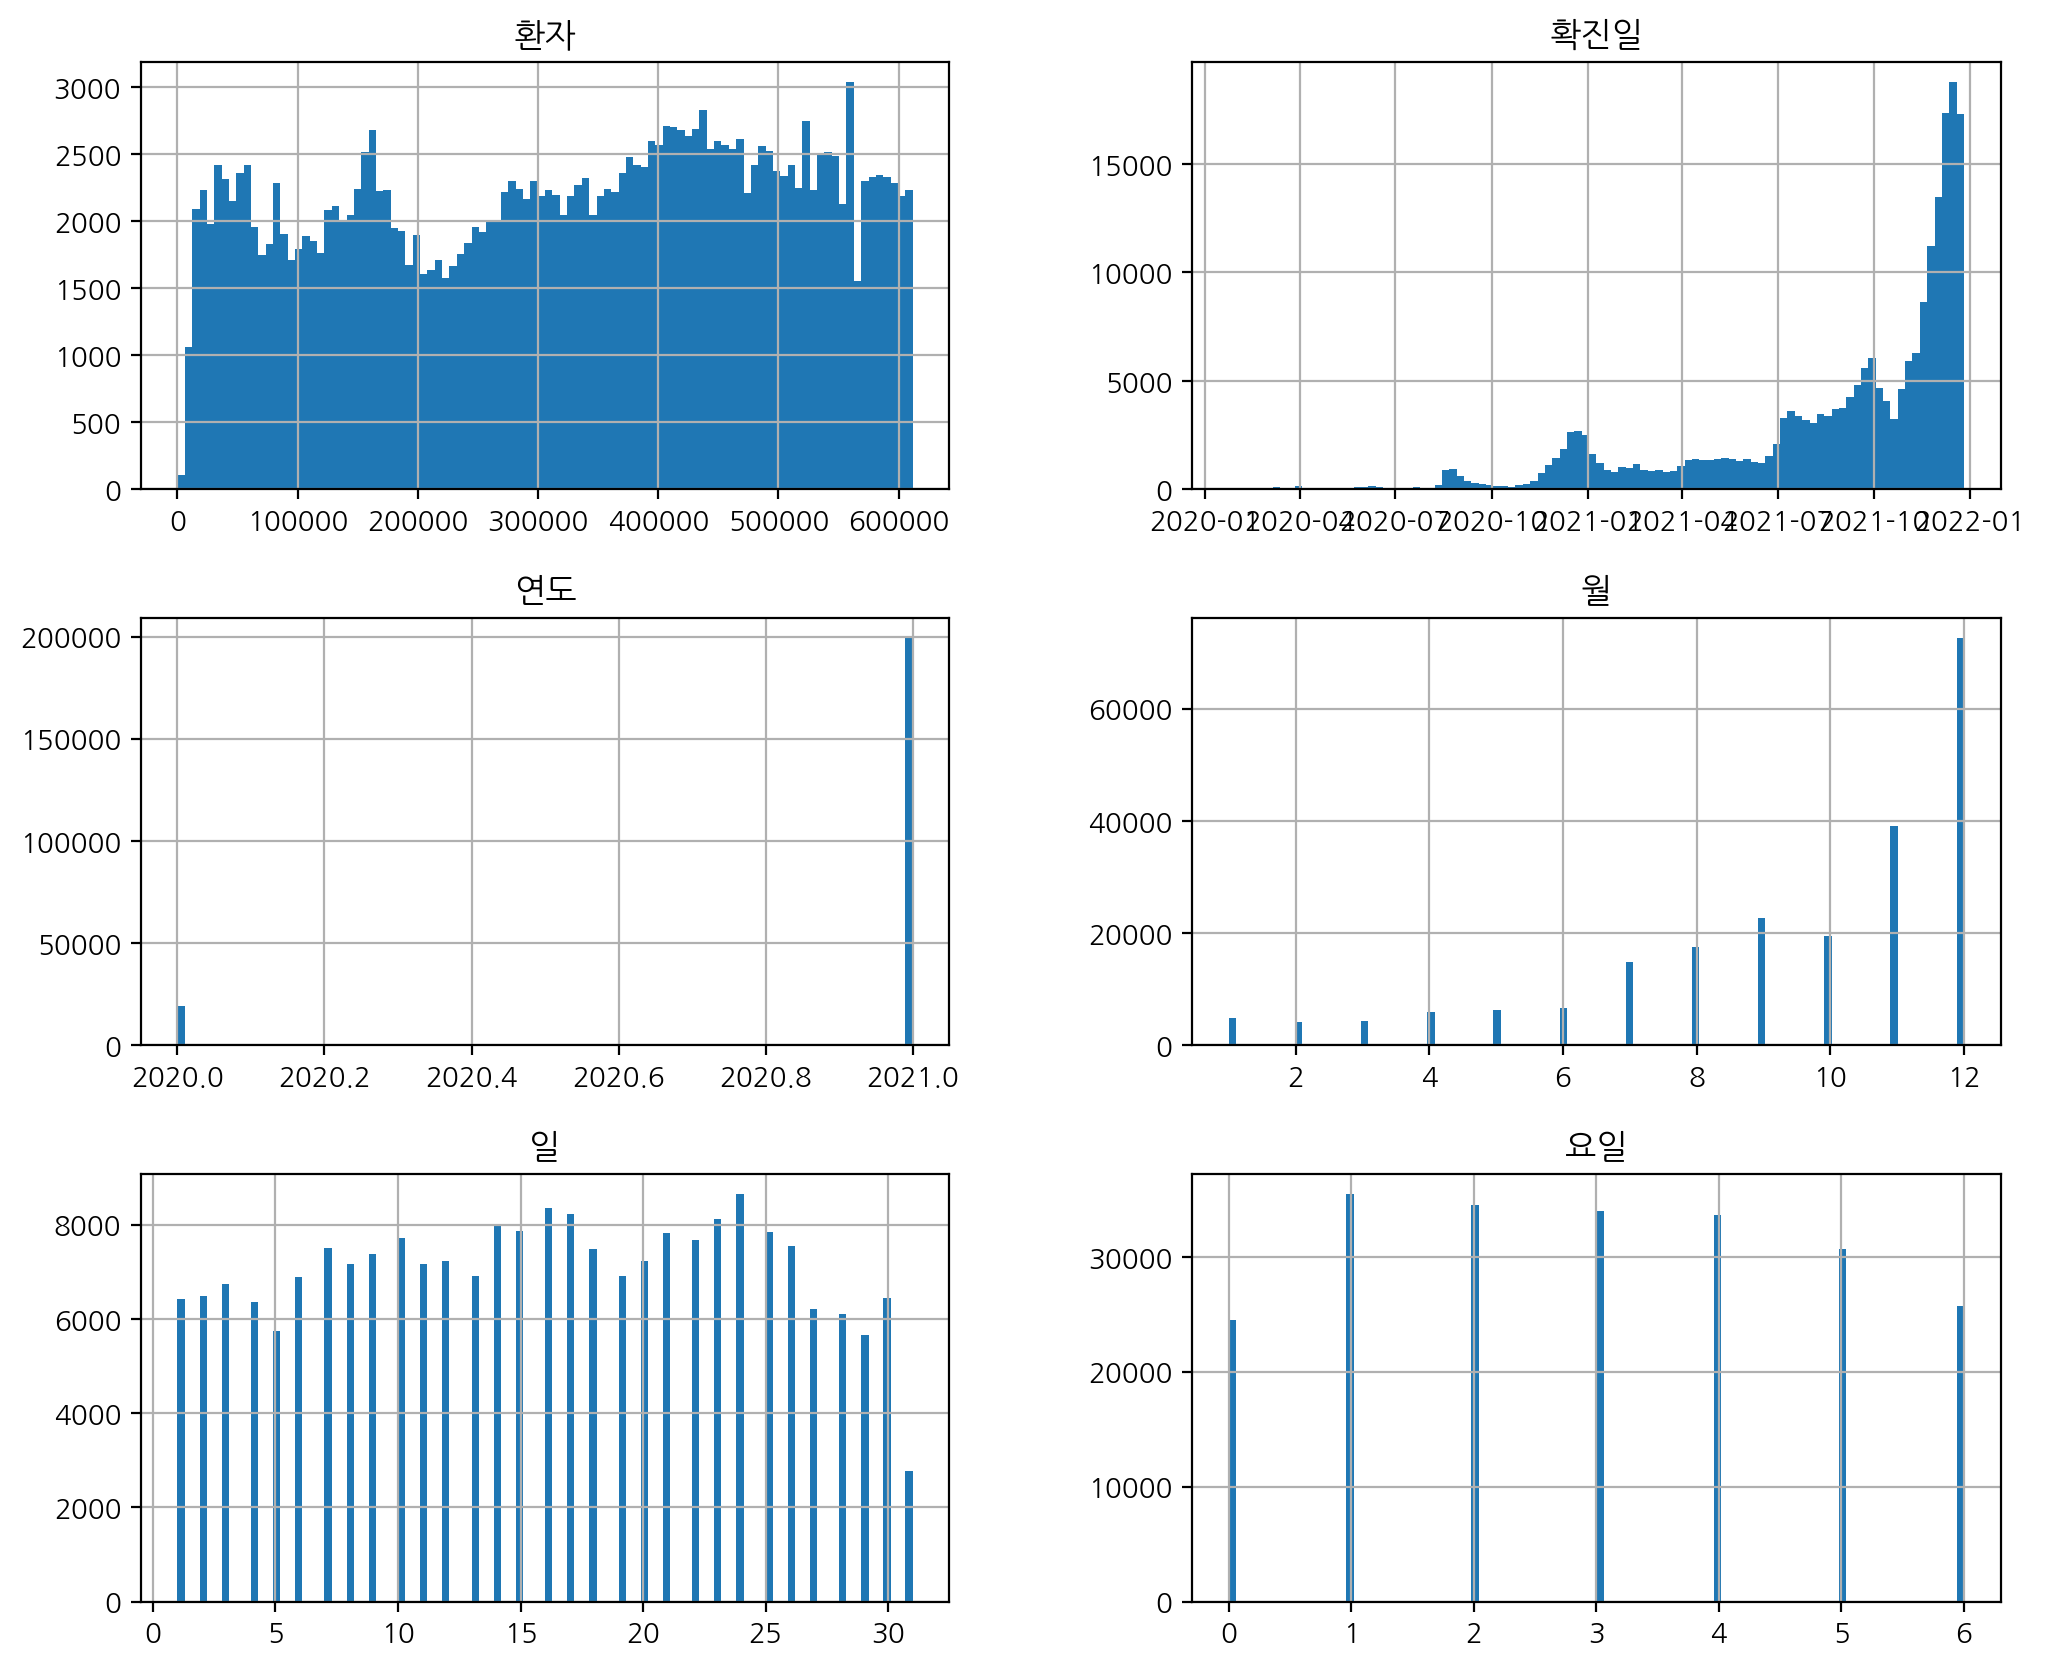

In [37]:
df.hist(bins=100, figsize=(12, 10));

# value_counts로 하나의 변수에 대한 빈도수

##  연도

In [38]:
df["연도"].value_counts()

2021    199253
2020     19393
Name: 연도, dtype: int64

In [39]:
# "연도" 컬럼의 비율
df["연도"].value_counts(normalize=True) * 100

2021    91.130412
2020     8.869588
Name: 연도, dtype: float64

## 연도월 

In [40]:
# 연도월에 대한 빈도수
# sort_index로 정렬
year_month = df["연도월"].value_counts().sort_index()

<AxesSubplot:>

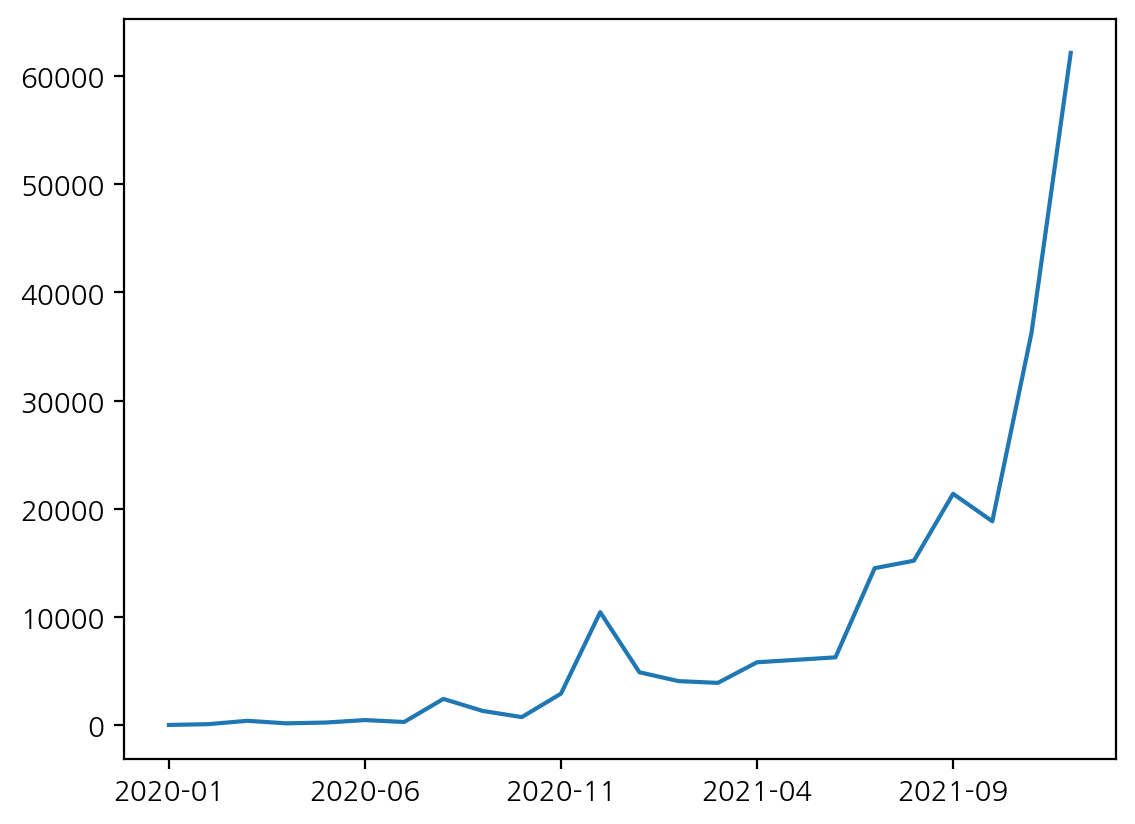

In [41]:
# 연도월 시각화
year_month.plot()

<AxesSubplot:>

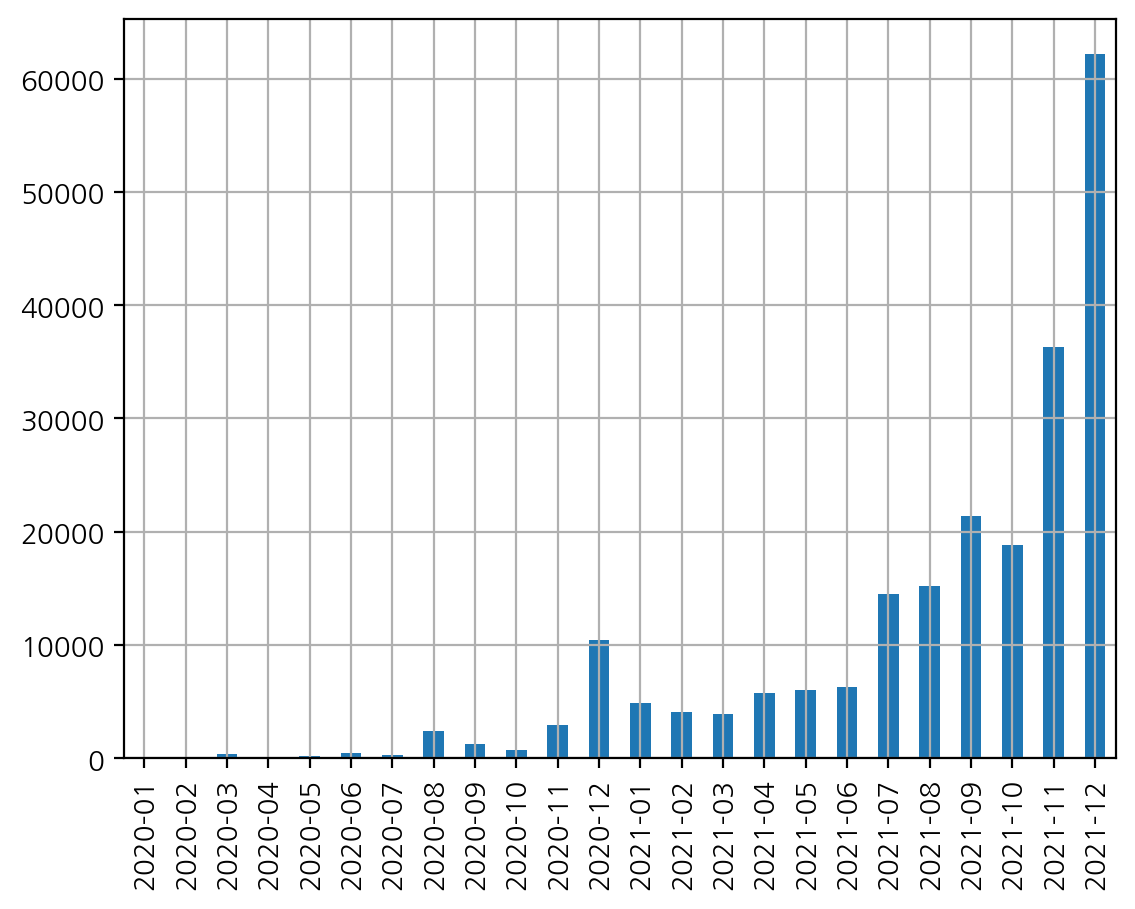

In [42]:
# 막대 그래프
year_month.plot(kind="bar", grid=True)

## 요일별 빈도수 

In [43]:
weekday_count = df["요일"].value_counts().sort_index()
weekday_count

0    24516
1    35471
2    34548
3    34030
4    33655
5    30692
6    25734
Name: 요일, dtype: int64

In [44]:
weekday_list = list("월화수목금토일")
weekday_list

['월', '화', '수', '목', '금', '토', '일']

<AxesSubplot:title={'center':'요일별 확진자 수'}, xlabel='요일', ylabel='명'>

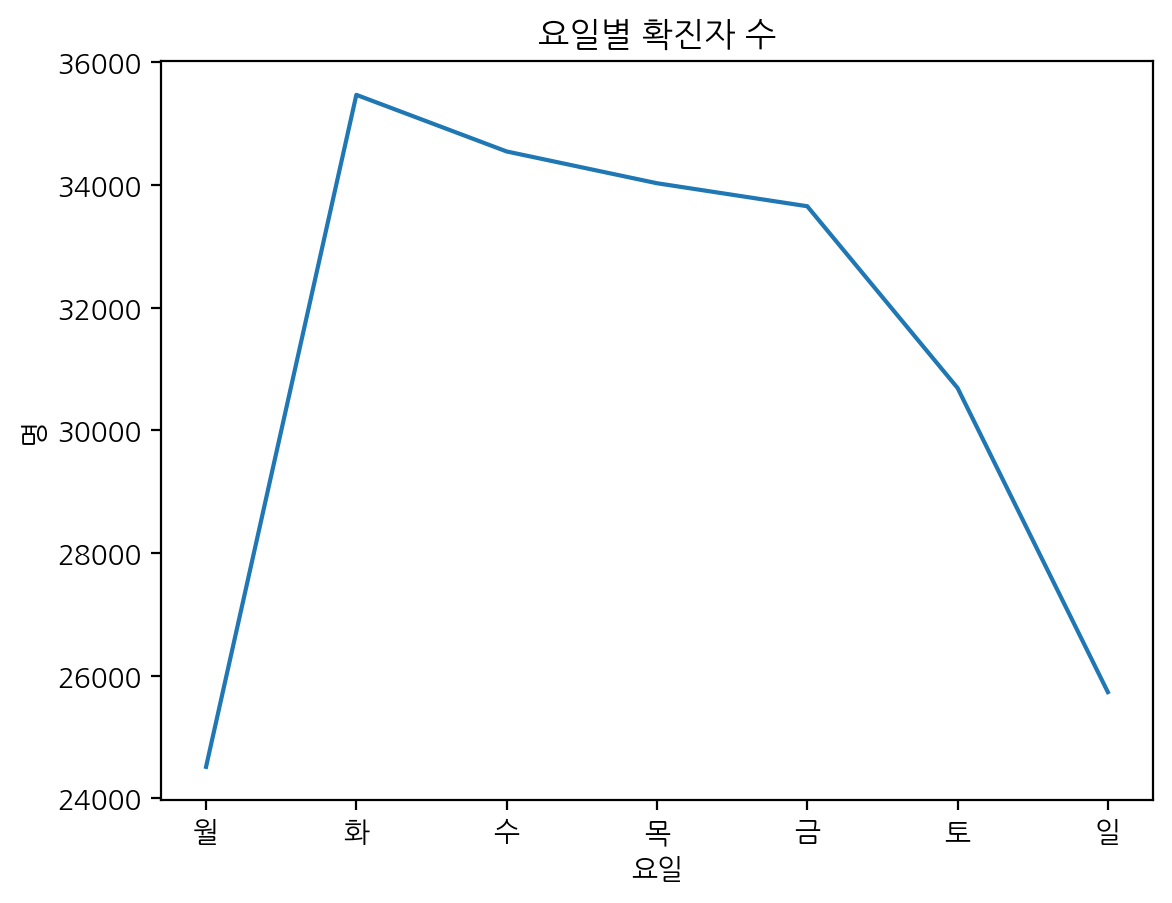

In [45]:
weekday_count.index = weekday_list
weekday_count.plot(title="요일별 확진자 수", xlabel="요일", ylabel="명")

## 요일명으로 구하기 

In [46]:
weekday_cnt = df["요일명"].value_counts()
weekday_cnt

화    35471
수    34548
목    34030
금    33655
토    30692
일    25734
월    24516
Name: 요일명, dtype: int64

In [47]:
# 인덱싱을 이용하여 한글 정렬 가능 
weekday_cnt[list("월화수목금토일")]

월    24516
화    35471
수    34548
목    34030
금    33655
토    30692
일    25734
Name: 요일명, dtype: int64

In [48]:
# 주말만 출력
weekday_cnt[["토", "일"]]

토    30692
일    25734
Name: 요일명, dtype: int64

<AxesSubplot:>

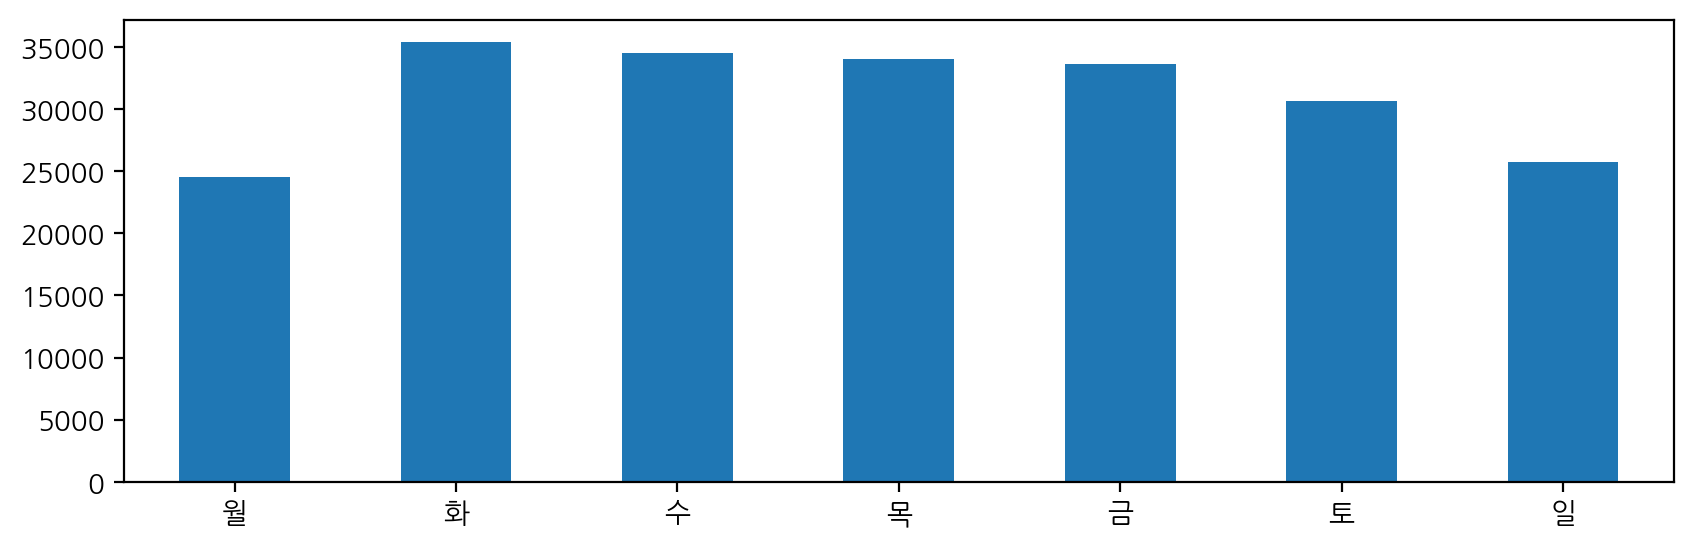

In [49]:
weekday_cnt[list("월화수목금토일")].plot(kind="bar", figsize=(10, 3), rot=0)

## 확진일 빈도수 구하기 

In [50]:
day_count = df["확진일"].value_counts().sort_index()

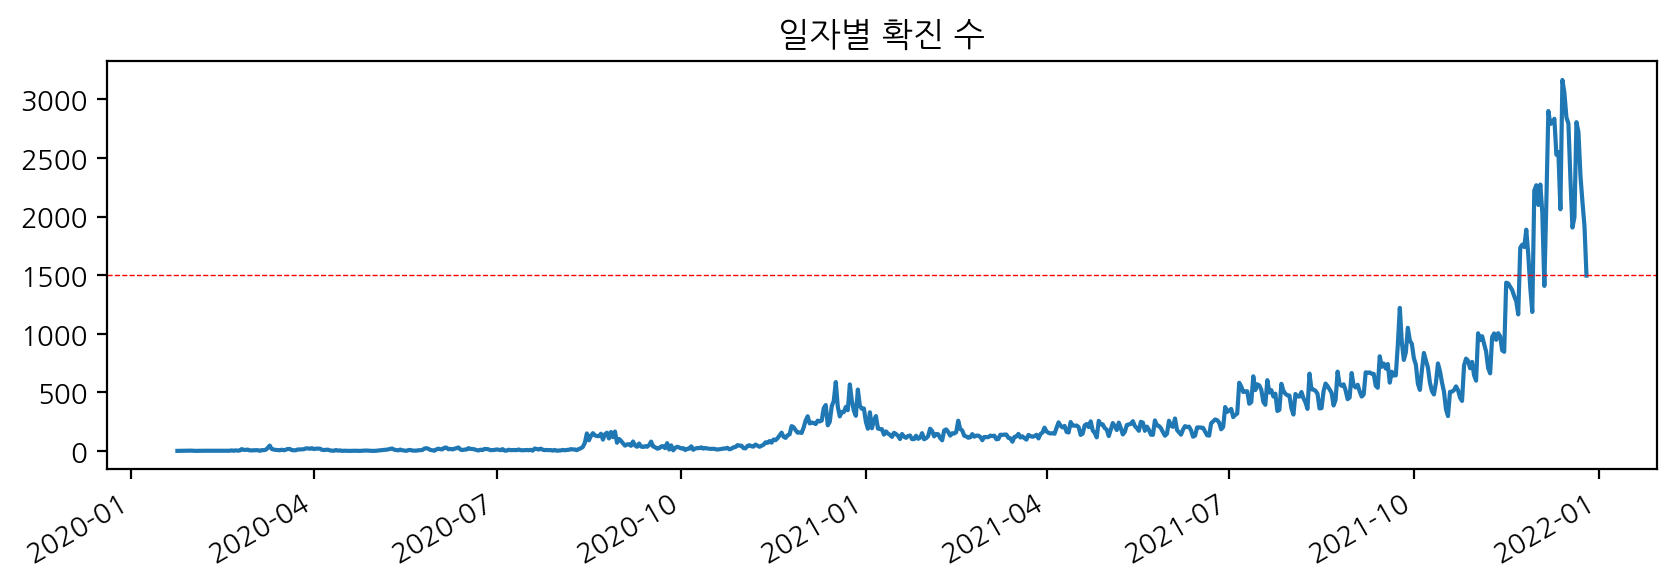

In [51]:
day_count.plot(title="일자별 확진 수", figsize=(10, 3))
plt.axhline(1500, c='r', lw=0.5, ls="--") 

<AxesSubplot:>

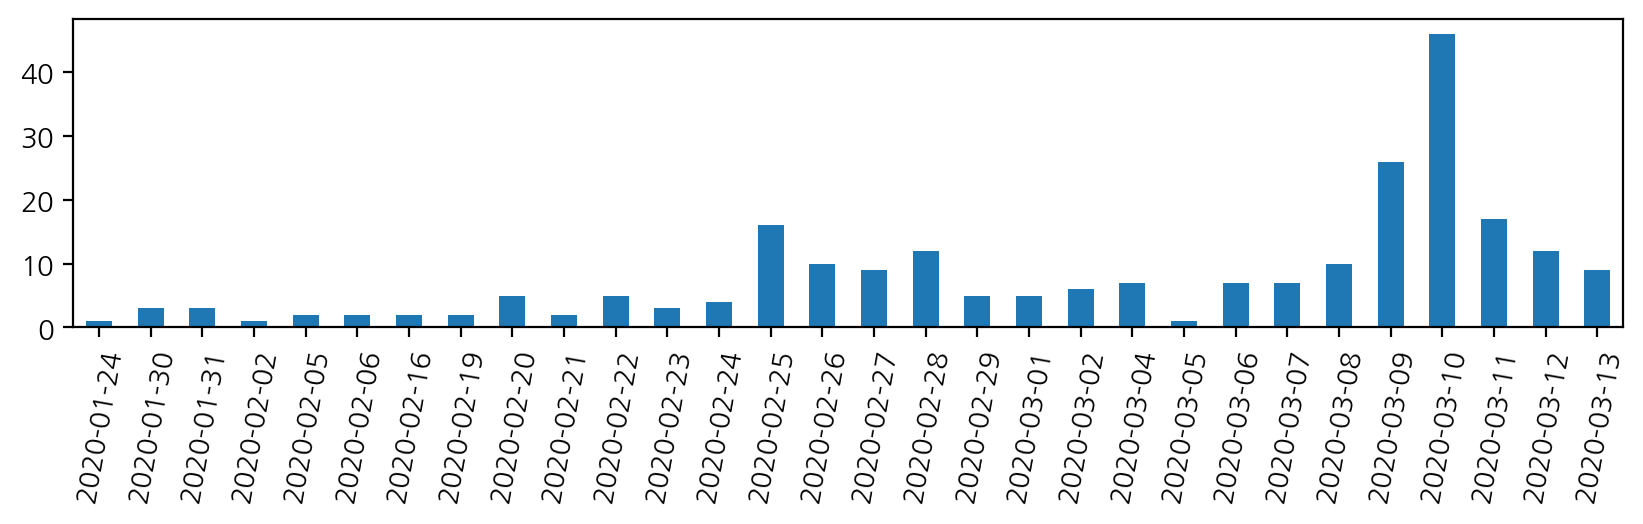

In [52]:
# 확진자가 나오지 않은, 0인날을 알고 싶지만 나와있지 않음 
day_count.index = day_count.index.astype(str)
day_count[:30].plot.bar(figsize=(10, 2), rot=80)

# 전체 확진일 데이터 
* 확진자가 나오지 않은날도 0으로 출력되게 하기

## iloc를 이용해 첫 확진일과 마지막 확진일자 구하기

In [53]:
last_day = df.iloc[0]["확진일"]
last_day

Timestamp('2021-12-26 00:00:00')

In [54]:
first_day = df.iloc[-1]["확진일"]
first_day

Timestamp('2020-01-24 00:00:00')

## date_range로 전체 기간 데이터 만들기 

In [55]:
# 전체 기간 생성
all_day = pd.date_range(start=first_day, end=last_day)
all_day

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2021-12-17', '2021-12-18', '2021-12-19', '2021-12-20',
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-25', '2021-12-26'],
              dtype='datetime64[ns]', length=703, freq='D')

In [56]:
df["확진일"].value_counts().sort_index()

2020-01-24       1
2020-01-30       3
2020-01-31       3
2020-02-02       1
2020-02-05       2
              ... 
2021-12-22    2719
2021-12-23    2346
2021-12-24    2123
2021-12-25    1917
2021-12-26    1496
Name: 확진일, Length: 671, dtype: int64

In [57]:
# all_day를 데이터프레임으로 반환
df_all_day = all_day.to_frame()
df_all_day["확진수"] = df["확진일"].value_counts().sort_index()
df_all_day = df_all_day.fillna(0)
df_all_day

,0,확진수
2020-01-24,2020-01-24,1.0
2020-01-25,2020-01-25,0.0
2020-01-26,2020-01-26,0.0
2020-01-27,2020-01-27,0.0
2020-01-28,2020-01-28,0.0
...,...,...
2021-12-22,2021-12-22,2719.0
2021-12-23,2021-12-23,2346.0
2021-12-24,2021-12-24,2123.0
2021-12-25,2021-12-25,1917.0


### join or merge로 구현해보자

In [58]:
df_test = df["확진일"].value_counts()
df_test

2021-12-14    3165
2021-12-15    3054
2021-12-07    2900
2021-12-16    2846
2021-12-10    2834
              ... 
2020-04-30       1
2020-05-01       1
2020-05-17       1
2020-03-05       1
2020-01-24       1
Name: 확진일, Length: 671, dtype: int64

In [59]:
df_all_day = all_day.to_frame()
df_all_day = df_all_day.join(df_test, how='left')
df_all_day = df_all_day.fillna(0)
del df_all_day[0]
df_all_day

,확진일
2020-01-24,1.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0
2020-01-28,0.0
...,...
2021-12-22,2719.0
2021-12-23,2346.0
2021-12-24,2123.0
2021-12-25,1917.0


In [60]:
df_all_day.columns = ["확진수"]
df_all_day

,확진수
2020-01-24,1.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0
2020-01-28,0.0
...,...
2021-12-22,2719.0
2021-12-23,2346.0
2021-12-24,2123.0
2021-12-25,1917.0


## 결측치 채우기

In [61]:
df_all_day["확진수"] = df_all_day["확진수"].fillna(0).astype(int)
df_all_day

,확진수
2020-01-24,1
2020-01-25,0
2020-01-26,0
2020-01-27,0
2020-01-28,0
...,...
2021-12-22,2719
2021-12-23,2346
2021-12-24,2123
2021-12-25,1917


In [62]:
# 필요없는 열 삭제
# del df_all_day[0]

<AxesSubplot:>

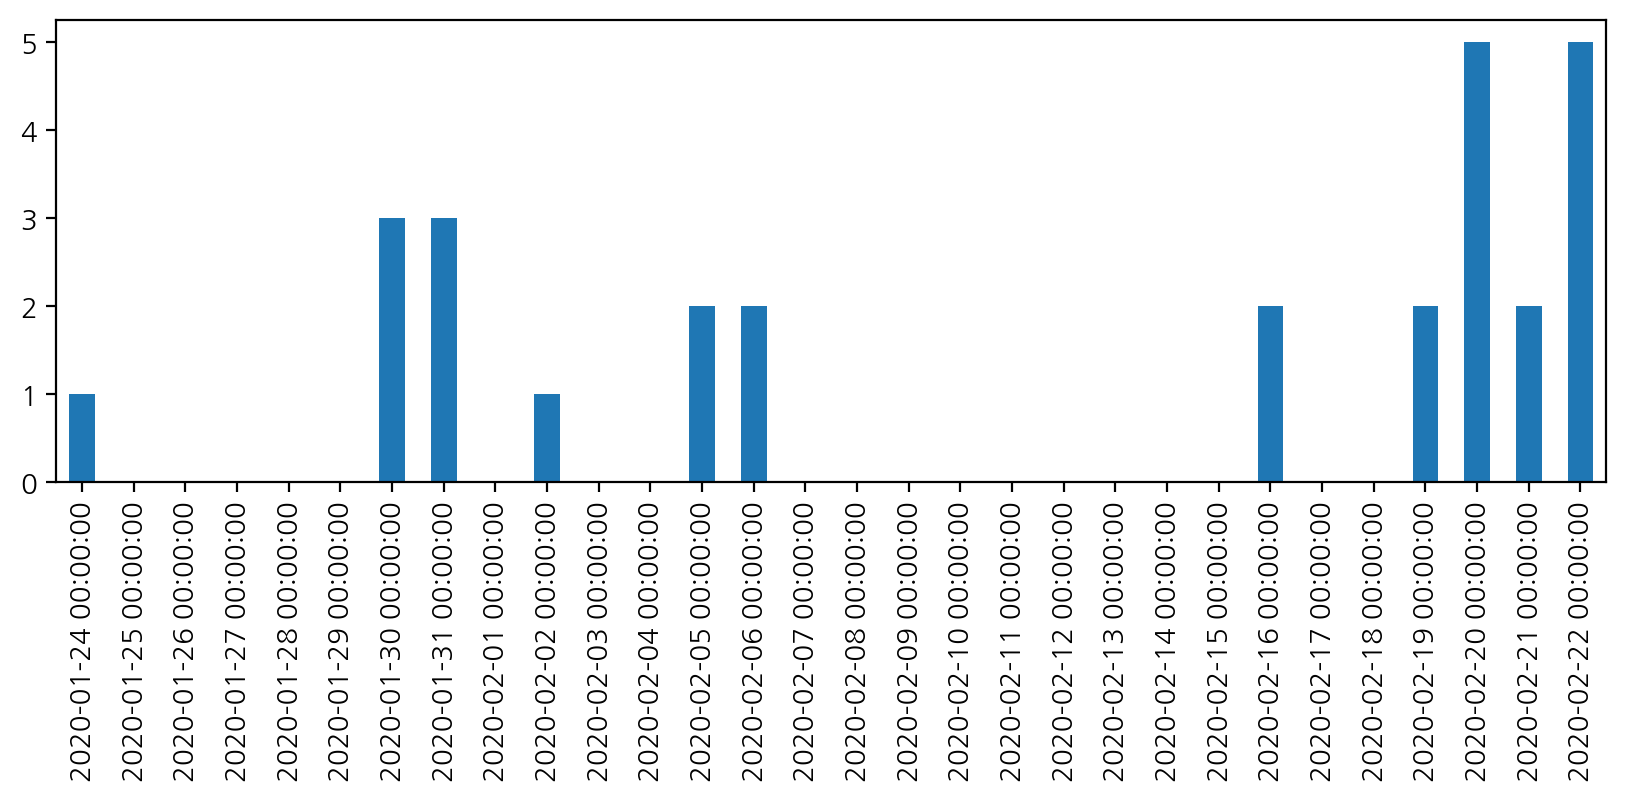

In [63]:
df_all_day["확진수"][:30].plot(kind="bar", figsize=(10, 3))

In [64]:
# 날짜만 표시하고자 할 때
df_all_day.index = df_all_day.index.astype(str)

<AxesSubplot:>

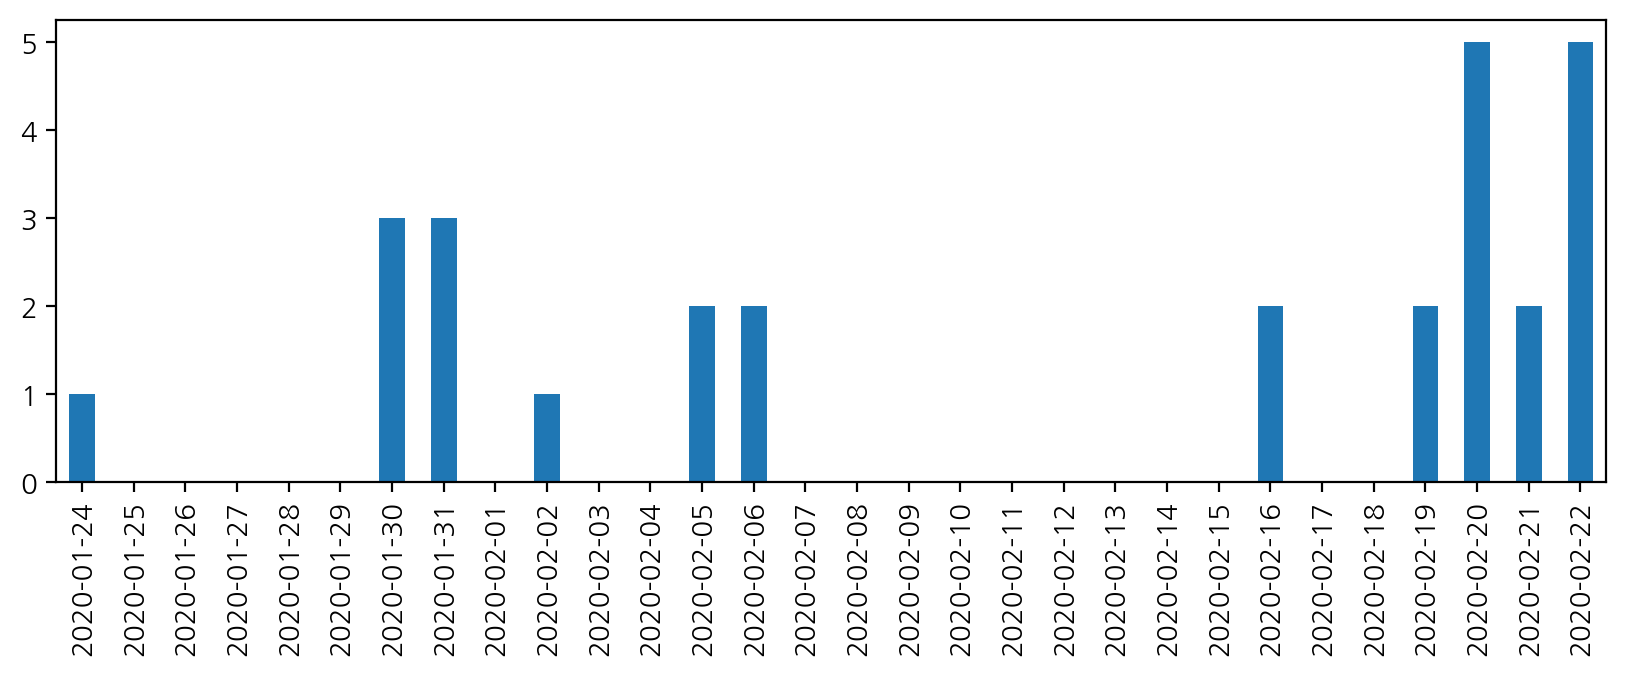

In [65]:
df_all_day["확진수"][:30].plot(kind="bar", figsize=(10, 3))

## 누적 확진 수 구하기 

In [66]:
df_all_day["확진수"].cumsum()

2020-01-24         1
2020-01-25         1
2020-01-26         1
2020-01-27         1
2020-01-28         1
               ...  
2021-12-22    210764
2021-12-23    213110
2021-12-24    215233
2021-12-25    217150
2021-12-26    218646
Name: 확진수, Length: 703, dtype: int64

In [67]:
df_all_day["누적확진수"] = df_all_day["확진수"].cumsum()

<AxesSubplot:>

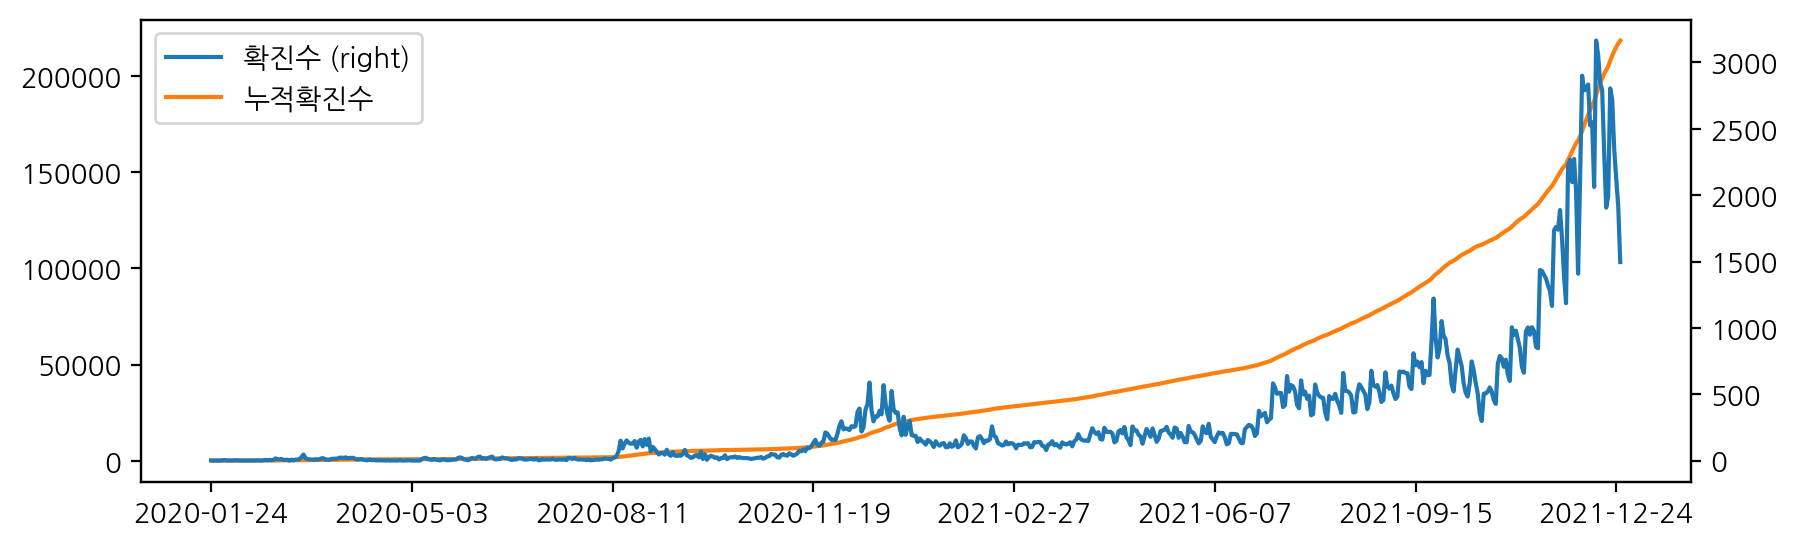

In [68]:
df_all_day.plot(secondary_y="확진수", figsize=(10, 3))

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

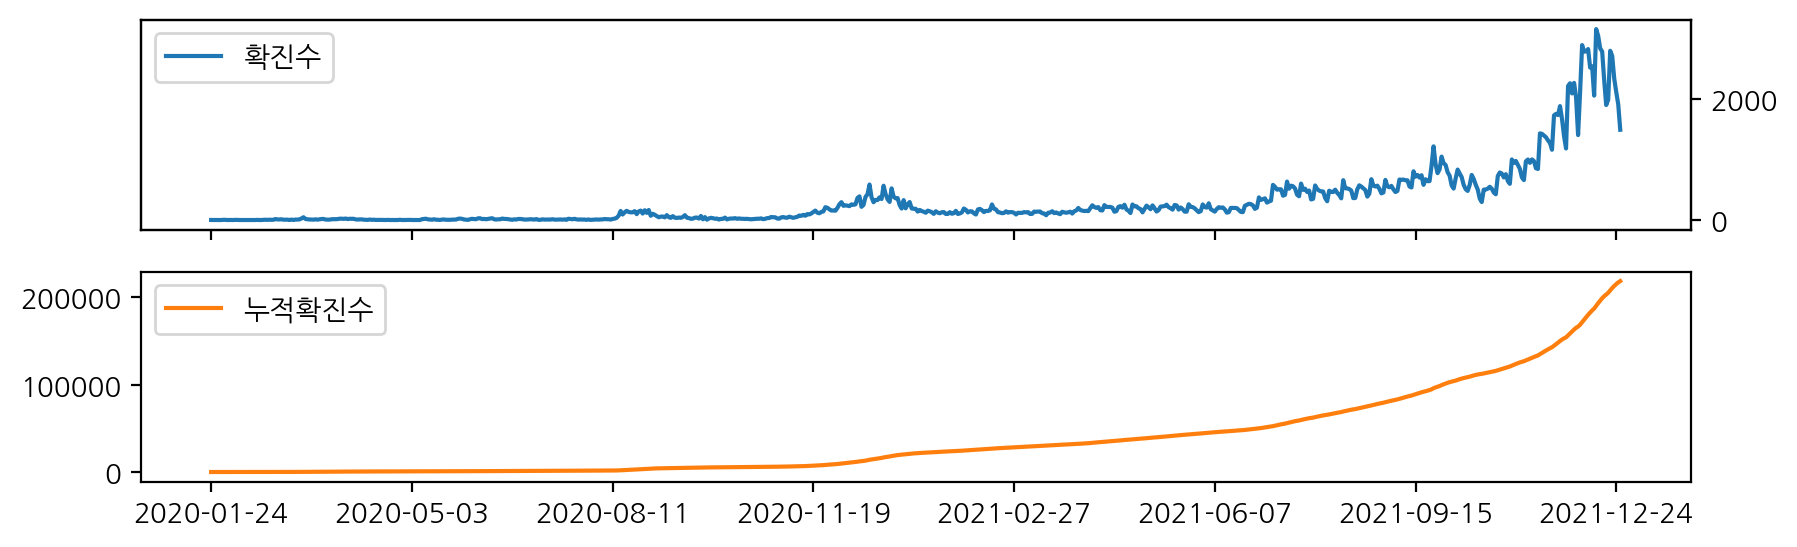

In [69]:
df_all_day.plot(secondary_y="확진수", figsize=(10, 3), subplots=True)

In [70]:
df_all_day

,확진수,누적확진수
2020-01-24,1,1
2020-01-25,0,1
2020-01-26,0,1
2020-01-27,0,1
2020-01-28,0,1
...,...,...
2021-12-22,2719,210764
2021-12-23,2346,213110
2021-12-24,2123,215233
2021-12-25,1917,217150


# 거주지

In [71]:
# 거주지 빈도수 구하기
df["거주지"].value_counts()

송파구     13235
강남구     12150
타시도     11320
관악구     10992
구로구     10346
영등포구    10225
강서구     10150
은평구      9393
노원구      9327
성북구      9142
동대문구     9091
강동구      8882
동작구      8558
중랑구      8236
서초구      8087
양천구      7709
마포구      7370
광진구      6819
도봉구      6501
강북구      6449
서대문구     5946
금천구      5635
성동구      5530
용산구      5137
기타       4995
종로구      3838
중구       3570
양천구         5
용산구         2
동작구         2
강동구         1
마포구         1
금천구         1
타시도         1
Name: 거주지, dtype: int64

In [72]:
# "거주지" -> "거주구"로 사본 생성
df["거주구"] = df["거주지"]
df["거주구"].head(2)

연번
218646    노원구
218645    노원구
Name: 거주구, dtype: object

In [73]:
# 텍스트 앞뒤 공백 제거
df["거주구"] = df["거주구"].str.strip()

In [74]:
# 타시도 -> 기타로 변경
df["거주구"] = df["거주구"].str.replace("타시도", "기타")

In [75]:
# 거주구 빈도수 확인, 잘 변경
df["거주구"].value_counts()

기타      16316
송파구     13235
강남구     12150
관악구     10992
구로구     10346
영등포구    10225
강서구     10150
은평구      9393
노원구      9327
성북구      9142
동대문구     9091
강동구      8883
동작구      8560
중랑구      8236
서초구      8087
양천구      7714
마포구      7371
광진구      6819
도봉구      6501
강북구      6449
서대문구     5946
금천구      5636
성동구      5530
용산구      5139
종로구      3838
중구       3570
Name: 거주구, dtype: int64

<AxesSubplot:>

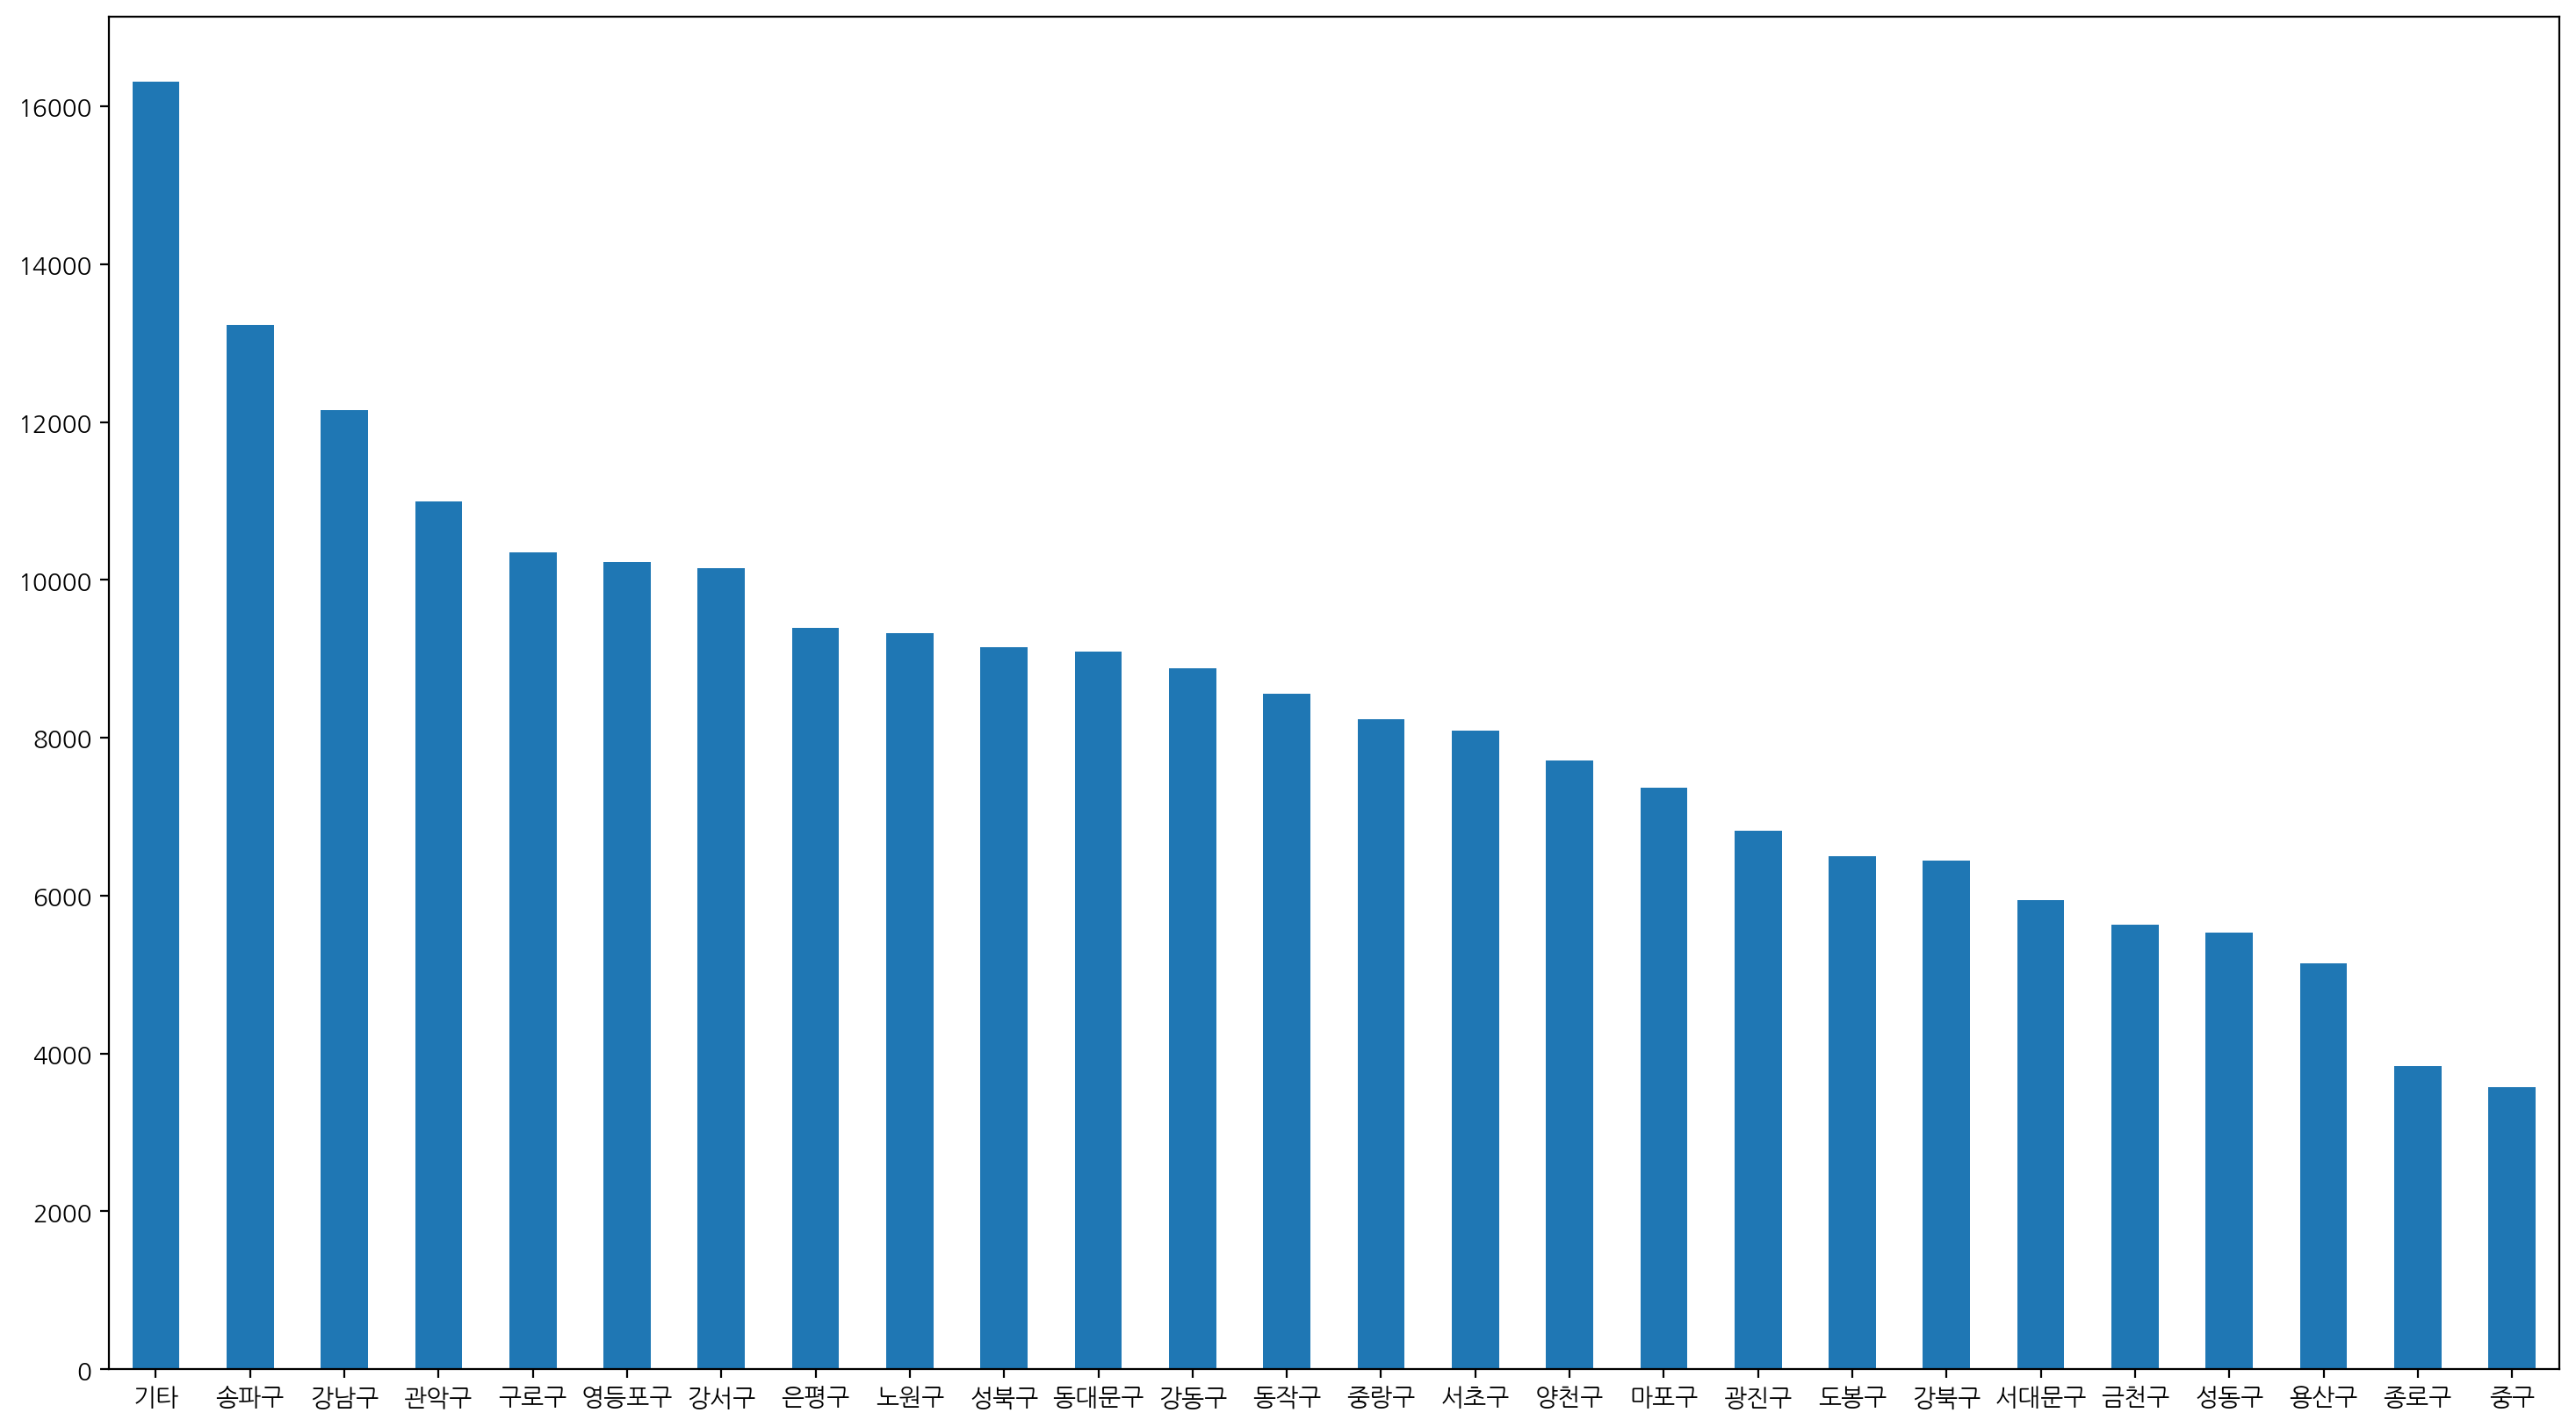

In [76]:
# gu_count 변수에 담아 시각화
gu_count = df["거주구"].value_counts()
gu_count.plot(kind="bar", figsize=(18, 10), rot=0)

# 두 개의 변수에 대한 빈도수

## 연도, 퇴원현황 두 개 변수

In [77]:
# 빈도수
cross = pd.crosstab(df["연도"], df["퇴원현황"])
cross

퇴원현황,사망,퇴원
연도,,
2020,308,19085
2021,1340,142764


In [78]:
# 빈율 구하기
cross['사망률'] = round(cross['사망'] / (cross["사망"] + cross["퇴원"]) * 100, 2)
cross['퇴원율'] = round(100 - cross['사망률'], 2)
cross

퇴원현황,사망,퇴원,사망률,퇴원율
연도,,,,
2020,308,19085,1.59,98.41
2021,1340,142764,0.93,99.07


## 연도, 월 두 개 변수

In [79]:
# 빈도수
year_month = pd.crosstab(df["연도"], df["월"])
year_month

월,1,2,3,4,5,6,7,8,9,10,11,12
연도,,,,,,,,,,,,
2020,7,80,391,156,229,459,281,2415,1306,733,2904,10432
2021,4878,4060,3897,5803,6030,6258,14504,15193,21382,18840,36267,62141


In [80]:
year_month.T

연도,2020,2021
월,,
1,7,4878
2,80,4060
3,391,3897
4,156,5803
5,229,6030
6,459,6258
7,281,14504
8,2415,15193
9,1306,21382


<AxesSubplot:xlabel='월'>

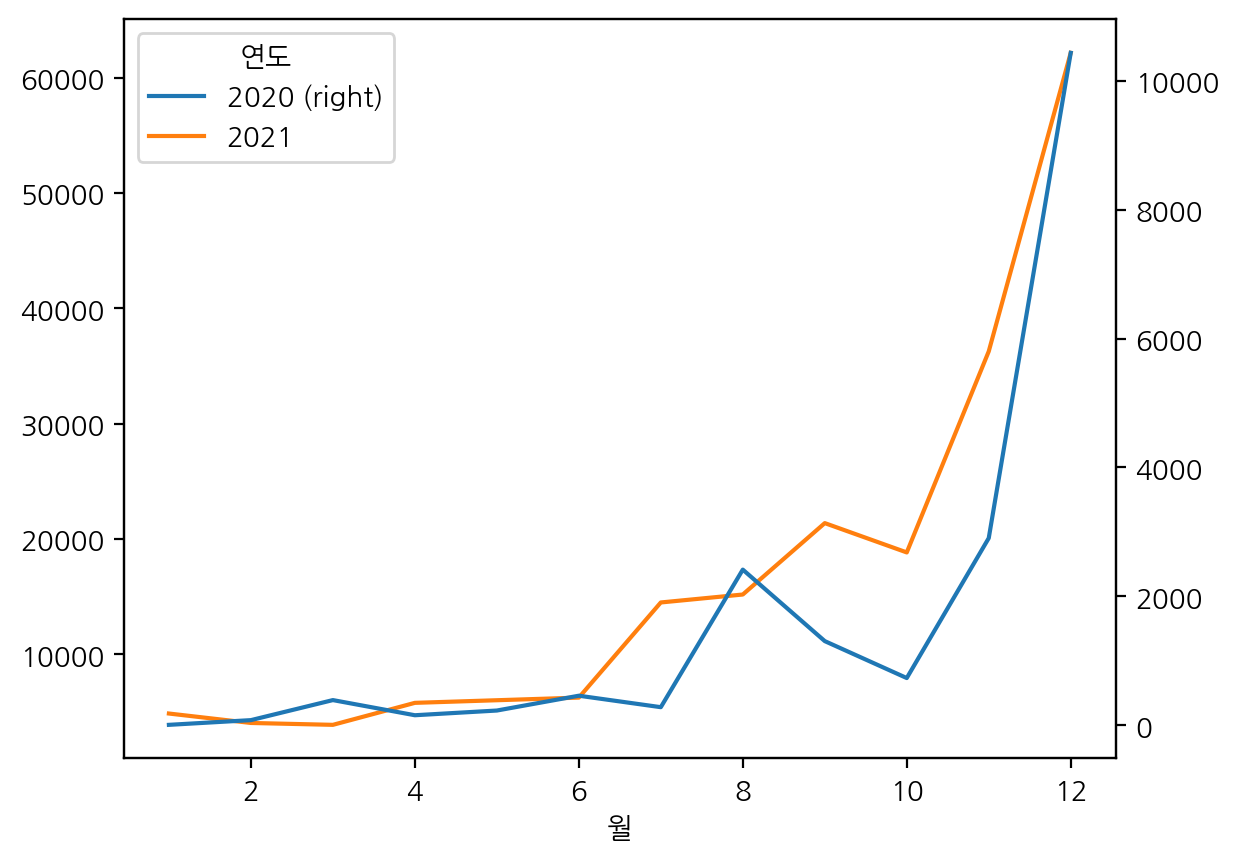

In [81]:
# 시각화
year_month.T.plot(secondary_y=2020)

## 연도, 요일 두 개 변수 

In [82]:
year_weekday = pd.crosstab(df["연도"], df["요일명"])
year_weekday

요일명,금,목,수,월,일,토,화
연도,,,,,,,
2020,2701,3462,2890,2626,2142,2676,2896
2021,30954,30568,31658,21890,23592,28016,32575


In [83]:
weekday_list = [year_weekday[weekday] for weekday in list("월화수목금토일")]
weekday_list

[연도
 2020     2626
 2021    21890
 Name: 월, dtype: int64,
 연도
 2020     2896
 2021    32575
 Name: 화, dtype: int64,
 연도
 2020     2890
 2021    31658
 Name: 수, dtype: int64,
 연도
 2020     3462
 2021    30568
 Name: 목, dtype: int64,
 연도
 2020     2701
 2021    30954
 Name: 금, dtype: int64,
 연도
 2020     2676
 2021    28016
 Name: 토, dtype: int64,
 연도
 2020     2142
 2021    23592
 Name: 일, dtype: int64]

In [84]:
year_weekday = pd.concat(weekday_list, axis = 1)
year_weekday

,월,화,수,목,금,토,일
연도,,,,,,,
2020,2626,2896,2890,3462,2701,2676,2142
2021,21890,32575,31658,30568,30954,28016,23592


<AxesSubplot:>

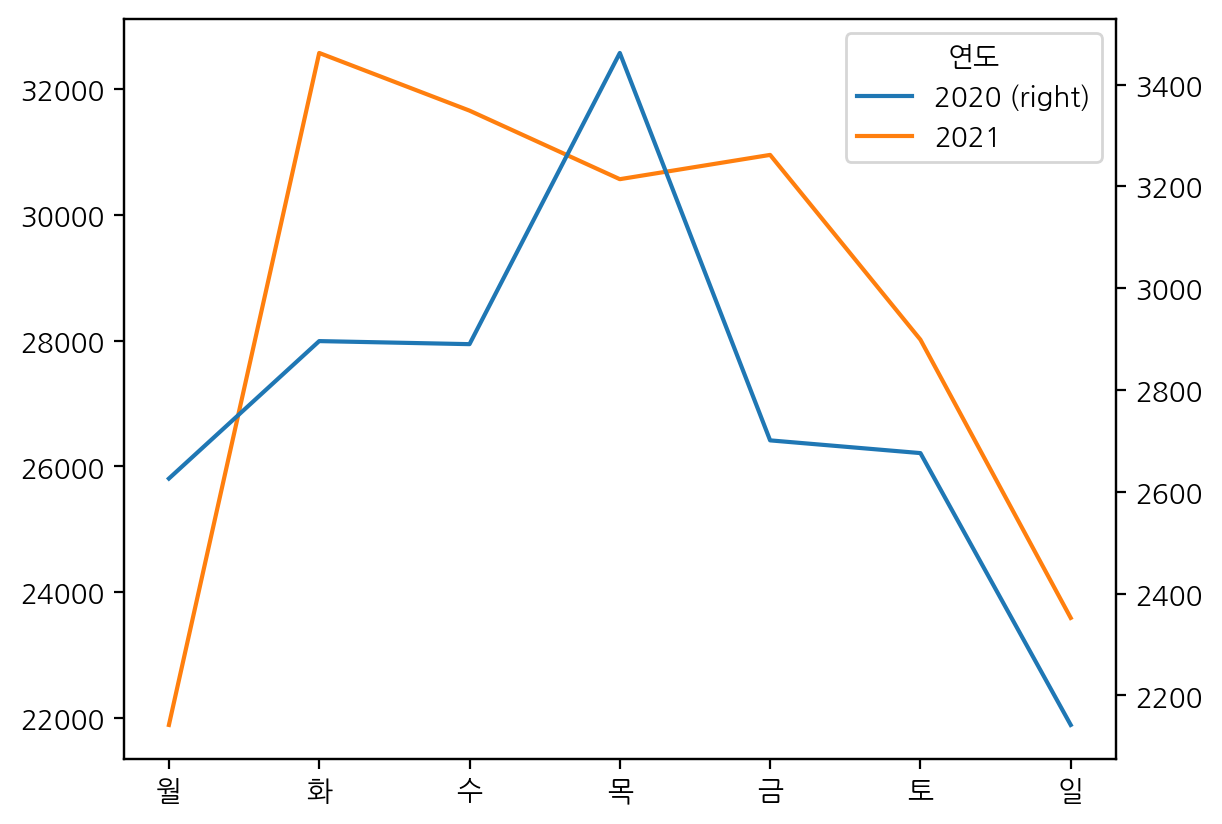

In [85]:
year_weekday.T.plot(secondary_y=2020)

## 거주구, 연도월에 대한 빈도수

In [86]:
# 거주구, 연도월에 대한 빈도수
region_year = pd.crosstab(df["거주구"], df["연도"])
region_year

연도,2020,2021
거주구,,
강남구,935,11215
강동구,582,8301
강북구,445,6004
강서구,1339,8811
관악구,1017,9975
광진구,461,6358
구로구,624,9722
금천구,326,5310
기타,2304,14012


In [87]:
# background_gradient() 로 빈도수 표현
region_year.style.background_gradient()

연도,2020,2021
거주구,,
강남구,935,11215
강동구,582,8301
강북구,445,6004
강서구,1339,8811
관악구,1017,9975
광진구,461,6358
구로구,624,9722
금천구,326,5310
기타,2304,14012


In [88]:
region_year.T.style.background_gradient()

거주구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
연도,,,,,,,,,,,,,,,,,,,,,,,,,,
2020,935,582,445,1339,1017,461,624,326,2304,813,574,633,811,694,513,826,450,812,1119,728,694,418,786,404,283,802
2021,11215,8301,6004,8811,9975,6358,9722,5310,14012,8514,5927,8458,7749,6677,5433,7261,5080,8330,12116,6986,9531,4721,8607,3434,3287,7434


# Boolean Indexing 으로 특정 조건 값 찾기 

## 복수 조건

In [89]:
# 강남구, "일요일" 확진 데이터
df[(df["거주구"] == "강남구") & (df["요일명"] == "일")]

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구
연번,,,,,,,,,,,,,
218406,611351,2021-12-26,강남구,-,기타 확진자 접촉,NaN,2021,12,26,6,2021-12,일,강남구
218397,610061,2021-12-26,강남구,-,기타 확진자 접촉,NaN,2021,12,26,6,2021-12,일,강남구
218382,607626,2021-12-26,강남구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,강남구
218318,607636,2021-12-26,강남구,-,기타 확진자 접촉,NaN,2021,12,26,6,2021-12,일,강남구
218315,607637,2021-12-26,강남구,-,기타 확진자 접촉,NaN,2021,12,26,6,2021-12,일,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,9642,2020-03-29,강남구,-,감염경로 조사중,퇴원,2020,3,29,6,2020-03,일,강남구
429,9607,2020-03-29,강남구,유럽,해외유입,퇴원,2020,3,29,6,2020-03,일,강남구
428,9603,2020-03-29,강남구,미국,해외유입,퇴원,2020,3,29,6,2020-03,일,강남구


In [90]:
# 강남구 거주, 여행력 일본
df[(df["거주구"] == "강남구") & (df["여행력"] == "일본")]

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구
연번,,,,,,,,,,,,,
47099,149511,2021-06-16,강남구,일본,해외유입,퇴원,2021,6,16,2,2021-06,수,강남구
31135,99978,2021-03-24,강남구,일본,감염경로 조사중,퇴원,2021,3,24,2,2021-03,수,강남구
15746,52848,2020-12-23,강남구,일본,해외유입,퇴원,2020,12,23,2,2020-12,수,강남구


## str.contains

In [91]:
# 접촉력 영문자 검색을 위해 대문자로
condition = df["접촉력"].str.contains("[a-zA-Z]")
df["접촉력 대문자"] = df[condition]["접촉력"].str.upper()
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구,접촉력 대문자
연번,,,,,,,,,,,,,,
218646,611159,2021-12-26,노원구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,노원구,NaN
218645,610703,2021-12-26,노원구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,노원구,NaN
218644,611537,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구,NaN
218643,607530,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구,NaN
218642,607522,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4,2020-01,금,성북구,NaN
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목,마포구,NaN
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3,2020-01,목,종로구,NaN


In [92]:
# PC방 데이터 조회
condition = df["접촉력 대문자"].str.contains("PC방") == True
df[condition]

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구,접촉력 대문자
연번,,,,,,,,,,,,,,
75267,238343,2021-08-23,용산구,-,용산구 소재 PC방 관련,퇴원,2021,8,23,0,2021-08,월,용산구,용산구 소재 PC방 관련
74077,233406,2021-08-20,용산구,-,용산구 소재 PC방 관련,퇴원,2021,8,20,4,2021-08,금,용산구,용산구 소재 PC방 관련
72912,230795,2021-08-18,용산구,-,용산구 소재 PC방 관련,퇴원,2021,8,18,2,2021-08,수,용산구,용산구 소재 PC방 관련
72102,226965,2021-08-17,용산구,-,용산구 소재 PC방 관련,퇴원,2021,8,17,1,2021-08,화,용산구,용산구 소재 PC방 관련
71923,226842,2021-08-16,용산구,-,용산구 소재 PC방 관련,퇴원,2021,8,16,0,2021-08,월,용산구,용산구 소재 PC방 관련
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,7437,2020-03-09,동작구,-,동대문관련(교회pc방),퇴원,2020,3,9,0,2020-03,월,동작구,동대문관련(교회PC방)
128,7234,2020-03-08,동대문구,-,동대문관련(교회pc방),퇴원,2020,3,8,6,2020-03,일,동대문구,동대문관련(교회PC방)
127,7247,2020-03-08,동대문구,-,동대문관련(교회pc방),퇴원,2020,3,8,6,2020-03,일,동대문구,동대문관련(교회PC방)


In [93]:
# pc방 빈도수 구하기
df[condition]["접촉력"].value_counts()

용산구 소재 PC방 관련    82
강북구 소재 PC방 관련    35
강남구 소재 PC방 관련    32
강북구 소재 pc방 관련    23
동대문관련(교회pc방)     20
성동구 소재 PC방 관련    10
금천구 소재 PC방 관련     9
Name: 접촉력, dtype: int64

## isin 

In [94]:
# "강남구", "서초구", "송파구" 데이터만 가져오기
condition = df["거주구"].isin(["강남구", "서초구", "송파구"])
df[condition]

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구,접촉력 대문자
연번,,,,,,,,,,,,,,
218644,611537,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구,NaN
218643,607530,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구,NaN
218642,607522,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구,NaN
218641,611064,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구,NaN
218640,611157,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,787,2020-02-22,서초구,-,타시도 확진자 접촉,퇴원,2020,2,22,5,2020-02,토,서초구,NaN
30,780,2020-02-22,송파구,-,타시도 확진자 접촉,퇴원,2020,2,22,5,2020-02,토,송파구,NaN
26,420,2020-02-22,서초구,-,타시도 확진자 접촉,퇴원,2020,2,22,5,2020-02,토,서초구,NaN


In [95]:
df[condition].loc[:, "접촉력"]

연번
218644      감염경로 조사중
218643      감염경로 조사중
218642      감염경로 조사중
218641      감염경로 조사중
218640      감염경로 조사중
             ...    
31        타시도 확진자 접촉
30        타시도 확진자 접촉
26        타시도 확진자 접촉
23        타시도 확진자 접촉
9               해외유입
Name: 접촉력, Length: 33472, dtype: object

# 여행력

In [103]:
condition = df["접촉력"] == "해외유입"
df["해외유입"] = 0

In [108]:
df.loc[condition, "해외유입"] = 1
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구,접촉력 대문자,해외유입
연번,,,,,,,,,,,,,,,
218646,611159,2021-12-26,노원구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,노원구,NaN,0
218645,610703,2021-12-26,노원구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,노원구,NaN,0
218644,611537,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구,NaN,0
218643,607530,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구,NaN,0
218642,607522,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4,2020-01,금,성북구,NaN,0
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목,마포구,NaN,1
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3,2020-01,목,종로구,NaN,0


In [110]:
# 거주구, 해외유입 빈도수
gu_oversee = pd.crosstab(df["거주구"], df["해외유입"])
gu_oversee

해외유입,0,1
거주구,,
강남구,11920,230
강동구,8817,66
강북구,6430,19
강서구,10035,115
관악구,10924,68
광진구,6769,50
구로구,10301,45
금천구,5617,19
기타,16029,287


In [112]:
# 거주구 해외유입 비율
gu_oversee["비율"] = gu_oversee[1] / (gu_oversee[0] + gu_oversee[1]) * 100
gu_oversee

해외유입,0,1,비율
거주구,,,
강남구,11920,230,1.893004
강동구,8817,66,0.742992
강북구,6430,19,0.294619
강서구,10035,115,1.133005
관악구,10924,68,0.618632
광진구,6769,50,0.733245
구로구,10301,45,0.434951
금천구,5617,19,0.337119
기타,16029,287,1.759010


<AxesSubplot:xlabel='거주구'>

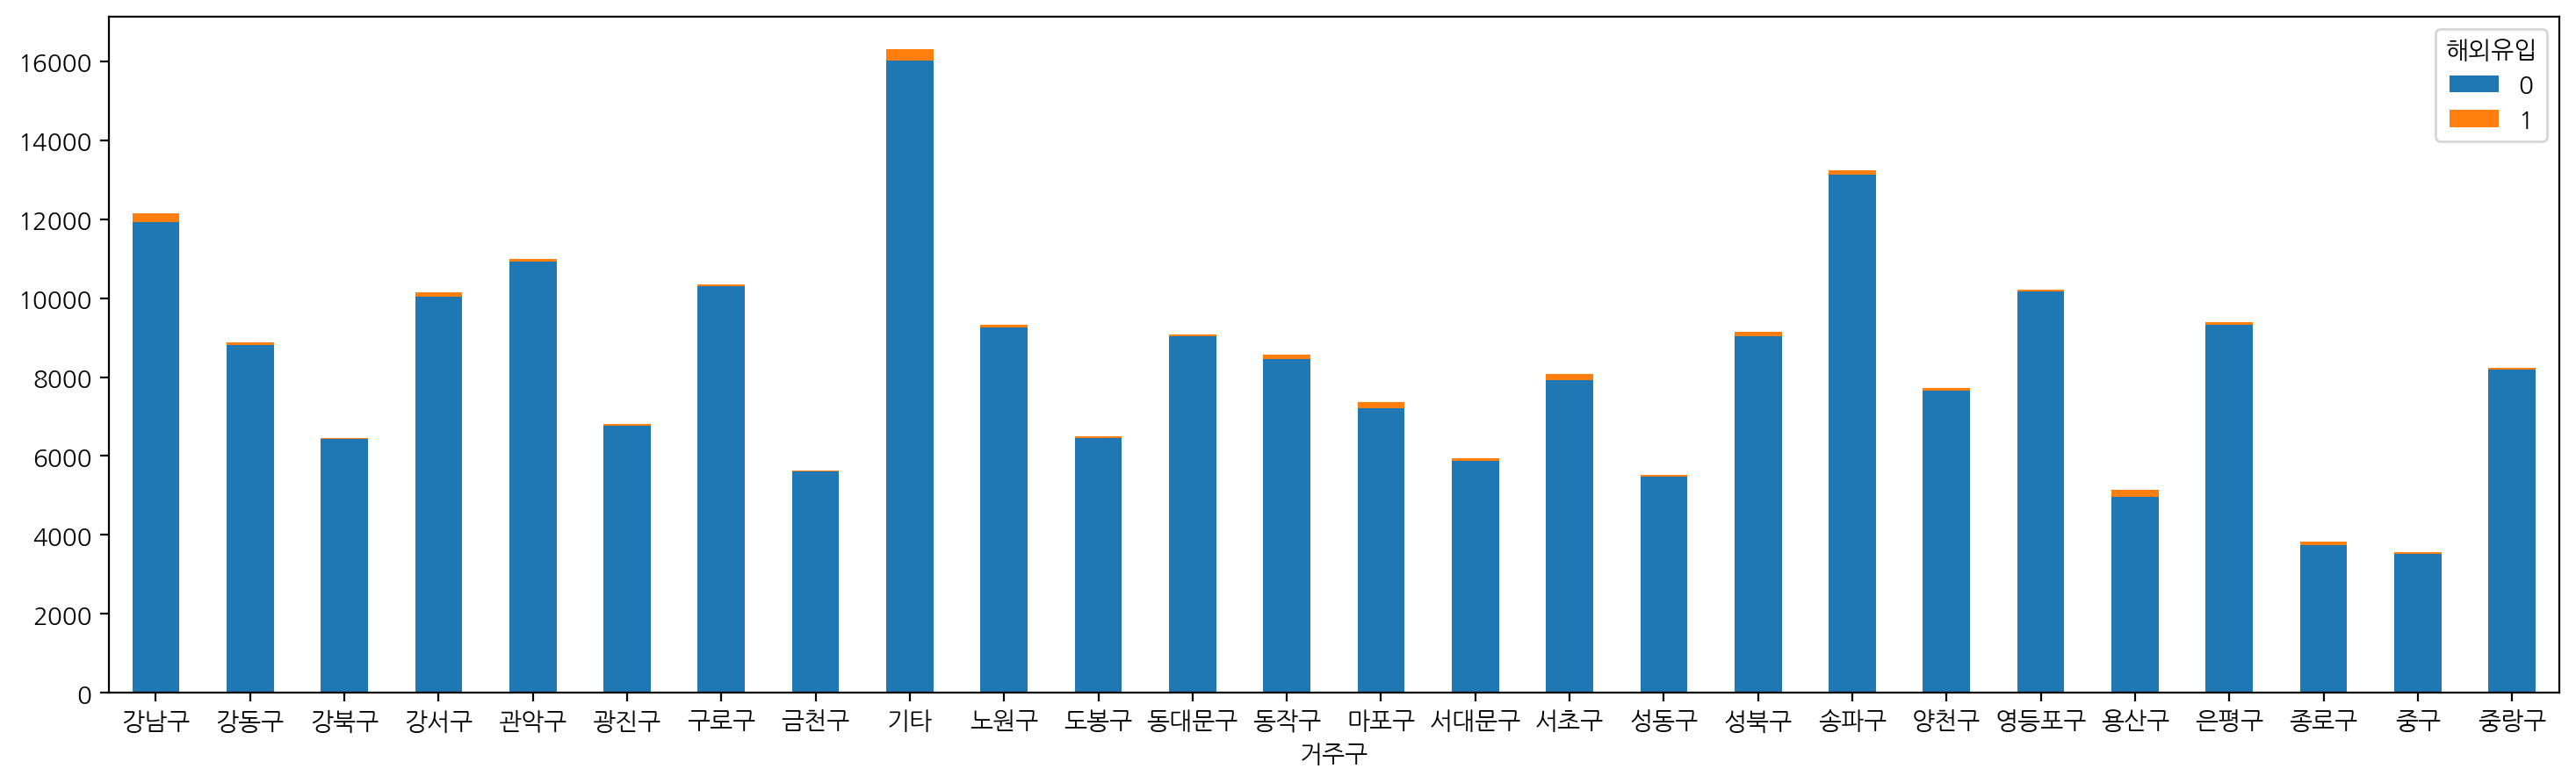

In [140]:
# 해외유입 여부 시각화
gu_oversee.iloc[:, :2].plot(kind="bar", stacked=True, figsize=(18, 5), rot=0)

# pivot_table 

In [ ]:
# 거주구별 해외유입 여부에 따른 빈도수
gu_over_count = pd.pivot_table(aggfunc=)

In [161]:
weekday_list = list("월화수목금토일")

In [162]:
df_gu_weekday[weekday_list].style.bar()

NameError: name 'df_gu_weekday' is not defined

# groupby 

In [153]:
# 거주구, 해외유입 으로 그룹화하여 환자 컬럼으로 빈도수
df.groupby(["거주구", "해외유입"])["환자"].count()

거주구   해외유입
강남구   0       11920
      1         230
강동구   0        8817
      1          66
강북구   0        6430
      1          19
강서구   0       10035
      1         115
관악구   0       10924
      1          68
광진구   0        6769
      1          50
구로구   0       10301
      1          45
금천구   0        5617
      1          19
기타    0       16029
      1         287
노원구   0        9267
      1          60
도봉구   0        6464
      1          37
동대문구  0        9040
      1          51
동작구   0        8463
      1          97
마포구   0        7201
      1         170
서대문구  0        5872
      1          74
서초구   0        7916
      1         171
성동구   0        5472
      1          58
성북구   0        9045
      1          97
송파구   0       13127
      1         108
양천구   0        7654
      1          60
영등포구  0       10164
      1          61
용산구   0        4957
      1         182
은평구   0        9326
      1          67
종로구   0        3750
      1          88
중구    0        3523
      1  

In [154]:
# "거주구", "해외유입" 으로 그룹화 하여 "환자" 컬럼으로 빈도수 구하고
# 마지막 인덱스를 컬럼으로 만들기
df.groupby(["거주구", "해외유입"])["환자"].count().unstack()

해외유입,0,1
거주구,,
강남구,11920,230
강동구,8817,66
강북구,6430,19
강서구,10035,115
관악구,10924,68
광진구,6769,50
구로구,10301,45
금천구,5617,19
기타,16029,287


In [157]:
# 연도, 월을 멀티인덱스로 사용하는 빈도수
df.groupby(["연도", "월"]).count().unstack()

환자                                                            ...  \
월       1     2     3     4     5     6      7      8      9      10  ...   
연도                                                                    ...   
2020     7    80   391   156   229   459    281   2415   1306    733  ...   
2021  4878  4060  3897  5803  6030  6258  14504  15193  21382  18840  ...   

      해외유입                                                              
월       3     4     5     6      7      8      9      10     11     12  
연도                                                                      
2020   391   156   229   459    281   2415   1306    733   2904  10432  
2021  3897  5803  6030  6258  14504  15193  21382  18840  36267  62141  

[2 rows x 156 columns]

In [160]:
df.groupby(["연도", "월"]).count().unstack()["해외유입"]

월,1,2,3,4,5,6,7,8,9,10,11,12
연도,,,,,,,,,,,,
2020,7,80,391,156,229,459,281,2415,1306,733,2904,10432
2021,4878,4060,3897,5803,6030,6258,14504,15193,21382,18840,36267,62141


In [159]:
# ["연도", "월"] 로 그룹화 하고 "해외유입" 의 describe
df.groupby(["연도", "월"]).count().unstack()["해외유입"].describe()

월,1,2,3,4,5,6,7,8,9,10,11,12
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000
mean,2442.500000,2070.000000,2144.000000,2979.500000,3129.500000,3358.500000,7392.500000,8804.00000,11344.000000,9786.500000,19585.500000,36286.500000
std,3444.317131,2814.284989,2479.116375,3993.031993,4101.926438,4100.512224,10057.179749,9035.41045,14195.875739,12803.582487,23591.203541,36563.784548
min,7.000000,80.000000,391.000000,156.000000,229.000000,459.000000,281.000000,2415.00000,1306.000000,733.000000,2904.000000,10432.000000
25%,1224.750000,1075.000000,1267.500000,1567.750000,1679.250000,1908.750000,3836.750000,5609.50000,6325.000000,5259.750000,11244.750000,23359.250000
50%,2442.500000,2070.000000,2144.000000,2979.500000,3129.500000,3358.500000,7392.500000,8804.00000,11344.000000,9786.500000,19585.500000,36286.500000
75%,3660.250000,3065.000000,3020.500000,4391.250000,4579.750000,4808.250000,10948.250000,11998.50000,16363.000000,14313.250000,27926.250000,49213.750000
max,4878.000000,4060.000000,3897.000000,5803.000000,6030.000000,6258.000000,14504.000000,15193.00000,21382.000000,18840.000000,36267.000000,62141.000000
